In [1]:
import mglearn
import numpy as np
import pandas as pd

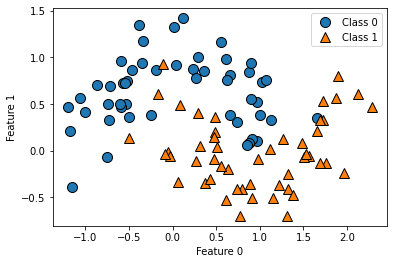

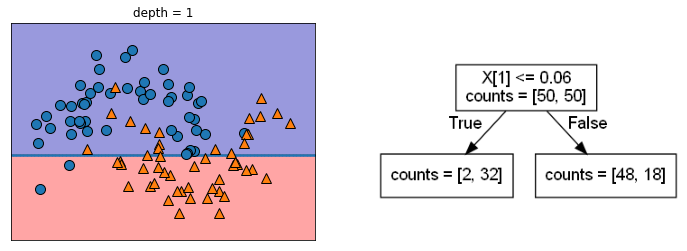

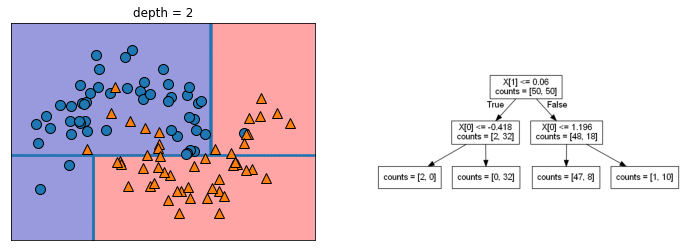

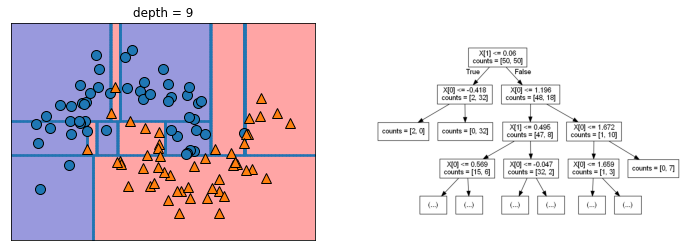

In [2]:
mglearn.plots.plot_tree_progressive()      #graphviz를 설치하고 환경변수 설정을 해야 제대로 출력됨

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

In [4]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer["data"], cancer["target"], random_state = 0)

In [5]:
model = DecisionTreeClassifier(random_state=0)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [6]:
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

1.0
0.8811188811188811


In [7]:
model = DecisionTreeClassifier(max_depth = 4,random_state=0)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [8]:
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.9929577464788732
0.9020979020979021


In [19]:
model = DecisionTreeClassifier(max_depth = 4, max_leaf_nodes = 8, random_state=0)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, max_leaf_nodes=8, random_state=0)

In [20]:
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.9788732394366197
0.951048951048951


In [21]:
from sklearn.tree import export_graphviz
import graphviz

In [22]:
import matplotlib.pyplot as plt
from matplotlib import rc
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

In [23]:
export_graphviz(model, out_file='tree.dot', class_names=['악성','양성'],
                feature_names=cancer.feature_names, impurity=False, filled=True)

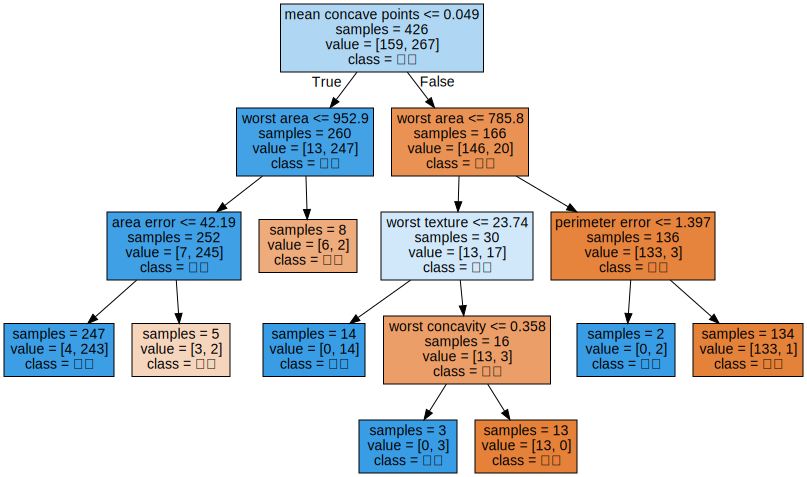

In [24]:
with open('tree.dot', encoding = "utf-8") as f :
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [25]:
model.feature_importances_                   #

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.75754333, 0.        , 0.        ,
       0.        , 0.        , 0.02109471, 0.01815043, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.05356208, 0.        , 0.12316271, 0.        ,
       0.        , 0.02648674, 0.        , 0.        , 0.        ])

In [26]:
cancer["feature_names"]    

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [27]:
import matplotlib.pyplot as plt

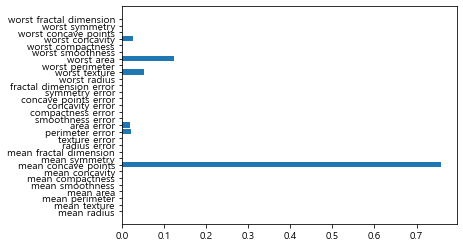

In [35]:
x= cancer["feature_names"]
y= model.feature_importances_
plt.barh(x,y)                            
plt.show()

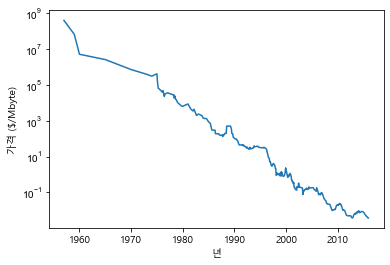

In [37]:
import os
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "ram_price.csv"))

plt.yticks(fontname = "Arial")  # 한글 폰트가 지수에 음수를 표시하지 못하므로 ytick의 폰트를 바꾸어 줍니다.
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("년")
plt.ylabel("가격 ($/Mbyte)")
plt.show() 

In [40]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

In [41]:
train = ram_prices[ram_prices["date"]< 2000]
test = ram_prices[ram_prices["date"]>= 2000]

In [45]:
X_train = train.date.to_numpy()[:, np.newaxis]
y_train = train["price"].apply(lambda x : np.log(x))

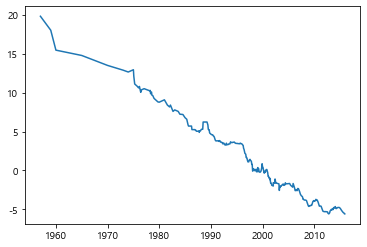

In [48]:
plt.plot(ram_prices["date"], ram_prices["price"].apply(lambda x : np.log(x)))

In [57]:
tree_model = DecisionTreeRegressor(max_depth = 4)
linear_model = LinearRegression()

tree_model.fit(X_train, y_train)
linear_model.fit(X_train, y_train)

LinearRegression()

In [58]:
X=ram_prices["date"].to_numpy()[:, np.newaxis]
y=ram_prices["date"].apply(lambda x : np.log(x))

In [59]:
pred_tree = tree_model.predict(X)
pred_linear = linear_model.predict(X)

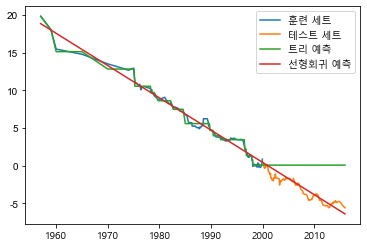

In [60]:
X_test = test.date.to_numpy()[:, np.newaxis]
y_test= test["price"].apply(lambda x : np.log(x))

plt.yticks(fontname = "Arial")
plt.plot(X_train,y_train, label = "훈련 세트")
plt.plot(X_test,y_test, label = "테스트 세트")
plt.plot(X, pred_tree, label = "트리 예측")
plt.plot(X, pred_linear, label = "선형회귀 예측")
plt.legend()
plt.show()